In [1]:
import numpy as np 
import pandas as pd 


In [2]:
x , y = [],[]
with open('Data/SMSSpamCollection.txt','r') as file:
    data = file.read()
    for data_item in data.split('\n') :
        if len(data_item.split('\t')) == 2:
            y.append(data_item.split('\t')[0])
            x.append(data_item.split('\t')[1])

print('Successfully read the data from text file and split into messages and labels')            

Successfully read the data from text file and split into messages and labels


In [3]:
len(x) ,len(y)

(5574, 5574)

In [4]:
# preparing a dataframe from our read data.

data_dict = {'email_message':x,'label':y}
df = pd.DataFrame(data_dict)
df.head()

,email_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [5]:
print("total numbers of emails :",df.shape[0])

total numbers of emails : 5574


In [6]:
single_email = df['email_message'][1]
print(single_email)
type(single_email)

Ok lar... Joking wif u oni...


str

In [7]:
single_email =single_email.lower()
single_email

'ok lar... joking wif u oni...'

In [8]:
import re # regular experession 


In [9]:
re.findall("2",single_email)

[]

In [10]:
# Substitute funtion 
re.sub("[^a-zA-Z ]","" ,single_email)

'ok lar joking wif u oni'

In [11]:
for i in range(len(df['email_message'])):
    email_message = df['email_message'][i]
    email_message = email_message.lower()
    # Use re.sub to remove non-alpha characters except spaces
    df['email_message'][i] = re.sub("[^a-zA-Z ]", "", email_message)

C:\Users\Vinayak\AppData\Local\Temp\ipykernel_12004\3467382049.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['email_message'][i] = re.sub("[^a-zA-Z ]", "", email_message)


In [12]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [13]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [14]:
ham.shape

(4827, 2)

In [15]:
# Collect only 1000 sample for balnacing the data of spam and ham
# Reduce the size of ham 
ham = ham.sample(1000)

In [16]:
ham.shape

(1000, 2)

In [17]:
spam.shape

(747, 2)

In [18]:
# spam = spam.sample(1000,replace=True)

In [19]:
spam.shape , ham.shape

((747, 2), (1000, 2))

In [20]:
new_df = pd.concat([spam,ham],axis='rows')

In [21]:
new_df.shape

(1747, 2)

In [22]:
new_df.duplicated().sum()

np.int64(156)

In [23]:
print(spam.duplicated().sum())

130


In [24]:
print(ham.duplicated().sum())

26


In [25]:
new_df['label'].value_counts()

label
ham     1000
spam     747
Name: count, dtype: int64

In [26]:
new_df['label'].map({'spam' : 1,'ham' : 0})

2       1
5       1
8       1
9       1
11      1
       ..
2117    0
1964    0
5332    0
3445    0
2373    0
Name: label, Length: 1747, dtype: int64

In [27]:
new_df['label'] =new_df['label'].map({'spam' : 1,'ham' : 0})

In [28]:
x = new_df['email_message']
y = new_df['label']

In [29]:
type(x)

pandas.core.series.Series

In [30]:
x = x.values

In [31]:
type(x)

numpy.ndarray

In [32]:
x.shape , len(y)

((1747,), 1747)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer 
bow_obj = CountVectorizer(max_features = 1500 ,stop_words='english')

X = bow_obj.fit_transform(x)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12860 stored elements and shape (1747, 1500)>

In [42]:
X_transformed = X.toarray()

In [43]:
X_transformed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
y.shape , X_transformed.shape

((1747,), (1747, 1500))

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_transformed,y,test_size = 0.15 ,random_state=42)

In [48]:
# Model Training Algorithm Train 
from sklearn.naive_bayes import MultinomialNB , BernoulliNB ,GaussianNB
mnb = MultinomialNB()
bnb =BernoulliNB()
gnb = GaussianNB()

In [49]:
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)
gnb.fit(x_train, y_train)
print("Successfully algos trained ")

Successfully algos trained 


In [51]:
print("MultinomialNB")
print("Training Score :", mnb.score(x_train,y_train))
print("testing Score:" ,mnb.score(x_test,y_test))
print()
print("BernoulliNB")
print("Training Score :", bnb.score(x_train,y_train))
print("testing Score:" ,bnb.score(x_test,y_test))
print()
print("GaussianNB")
print("Training Score :", gnb.score(x_train,y_train))
print("testing Score:" ,gnb.score(x_test,y_test))
print()

MultinomialNB
Training Score : 0.9582210242587601
testing Score: 0.9543726235741445

BernoulliNB
Training Score : 0.9575471698113207
testing Score: 0.9429657794676806

GaussianNB
Training Score : 0.9818059299191375
testing Score: 0.9239543726235742



In [52]:
prediction = mnb.predict(x_test)
prediction 

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [53]:
y_test.values

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [56]:
evaluation_df=pd.DataFrame({'Actual_Class': y_test.values,"Predicted_Class":prediction})
evaluation_df.head(10)


,Actual_Class,Predicted_Class
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


In [57]:
evaluation_df['Actual_Class']= evaluation_df['Actual_Class'].map({1:'spam',0:'ham'})
evaluation_df['Predicted_Class']= evaluation_df['Predicted_Class'].map({1:'spam',0:'ham'})


In [58]:
evaluation_df.head(10)

,Actual_Class,Predicted_Class
0,ham,ham
1,ham,ham
2,spam,spam
3,spam,spam
4,spam,spam
5,ham,ham
6,ham,ham
7,spam,spam
8,spam,spam
9,spam,spam


In [69]:
from sklearn.metrics   import confusion_matrix , classification_report
# print("confusion matrix:",confusion_matrix(evaluation_df['Actual_Class'],evaluation_df['Predicted_Class']))

In [70]:
matrix = confusion_matrix(evaluation_df['Actual_Class'],evaluation_df['Predicted_Class'])
matrix

array([[136,   5],
       [  7, 115]])

In [71]:
import seaborn as sns 
import matplotlib.pyplot as plt

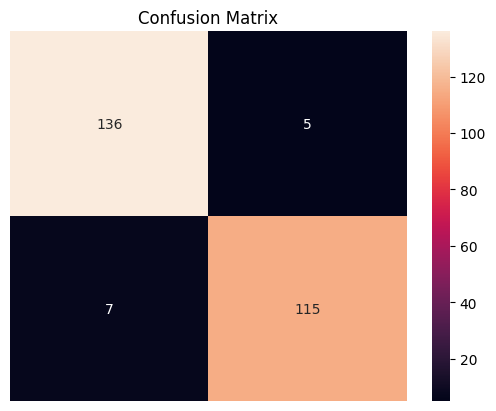

In [72]:
sns.heatmap(matrix, annot=True,fmt ='d')
plt.title("Confusion Matrix")
plt.axis('off')
plt.show()

In [73]:
print(classification_report(evaluation_df['Actual_Class'],evaluation_df['Predicted_Class']))

              precision    recall  f1-score   support

         ham       0.95      0.96      0.96       141
        spam       0.96      0.94      0.95       122

    accuracy                           0.95       263
   macro avg       0.95      0.95      0.95       263
weighted avg       0.95      0.95      0.95       263



Dump the algos into models form

In [77]:
import joblib , os
os.makedirs('models',exist_ok=True)

joblib.dump(mnb,'./models/multinomialnaivebayes.lb')
joblib.dump(bnb,'./models/bernolinomialnaivebayes.lb')
joblib.dump(gnb,'./models/Gussionnomialnaivebayes.lb')
joblib.dump(bow_obj,'./models/countervectorizer.lb')

print("All the algos saved successfully!")

All the algos saved successfully!


In [79]:
mnb

MultinomialNB()

In [80]:
bnb

BernoulliNB()

In [81]:
gnb

GaussianNB()

In [82]:
bow_obj

CountVectorizer(max_features=1500, stop_words='english')

Thank You